

# Project: Investigate TMDb Movie Dataset 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen the TMDb movie dataset in order to complete project2: **Investigate Dataset** in the Data Analysis Nanodegree program. 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



## Questions



**Research Question 1: Which movie has made the highest or lowest profits?**

**Research Question 2: What kinds of properties are associated with movies that have high profits?**
<ol>
    <li>What are the top 5 movies based on its profits?</li>
    <li>Who directed the highest profits movies?</li>
    <li>Who actor/actress holds the record for acting in the highest profits movies?</li>
    <li>Which genre has the highest release of most profitable movies?</li>
    <li>Which keyword has the highest appearance of most profitable movies?</li>
    <li>What is the average runtime of the most profitable movies?</li>
    <li>What is the average budget of the most profitable movies?</li>
    </ol>

---

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties and Important Observations About TMDb Movies Dataset

In [2]:
# loading tmdb-movies dataset and printing out a few lines.

df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### 1. Number of features and samples.

In [3]:
print('This dataset consists of {} features and {} samples.'.format(df.shape[1],df.shape[0]))

This dataset consists of 21 features and 10866 samples.


#### 2.  Extraneous features.

There are some features in the dataset which have no influential to the investigation, therefore, they must be droped to have a clear dataset. These features are:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>overview</li>
    <li>release_date</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
    </ul>

#### 2. Check for duplicated rows.

In [4]:
print ('There is {} duplicated row in this dataset which must be removed.'.format(sum(df.duplicated())))

There is 1 duplicated row in this dataset which must be removed.


#### 3. Check for zero value in revenue and budget .

Each movie must have certain budget value and earned revenue. Therefore, we must check for zero values in these features.

In [5]:
# check for zero value in revenue
df.revenue.eq(0).value_counts()

True     6016
False    4850
Name: revenue, dtype: int64

In [6]:
# check for zero value in budget
df.budget.eq(0).value_counts()

True     5696
False    5170
Name: budget, dtype: int64

We conclude that there are lots of movies that have zero value in either revenue or budget or both. This means that the actual values have not been entered. proceeding the analysis with these movies could statistically affect the final results. 
Therefore, deleting all these movies is the best way to have appropriate results.

#### 4. Check for zero value in runtime .

Each movie has to have runtime or duration. So, having zero value in runtime should be regarded as missing value.

In [7]:
# check for zero value in runtime
df.runtime.eq(0).value_counts()

False    10835
True        31
Name: runtime, dtype: int64

There are 31 movies that have zero runtime which is a small amount compare to the dataset size. Since these zeros cannot be replaced with reasonable data, the best way is to drop these movies.

#### 5. Features have missing values.

In [8]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Since all the missing values are strings, therefore, they might not affect the statistical results.

#### 6. Check the datatype format.

In [9]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**release_date** is not in date format. However, this column will not gonna be used during the exploration phase.

#### 7. A single cell with multiple values.

Such features in the dataset cotanin multiple values in a single cell seperated with pipe (|). The features are:

 <ul>
    <li>cast</li>
    <li>director</li>
    <li>keywords</li>
    <li>genres</li>
    <li>production_companies </li>
    </ul>
In order to have further analysis on these columns, we must split these cells into individual cells.



----

### Data Cleaning

After discussing the structure of the data and the problems that need to be cleaned, this section will perform the cleaning steps.


#### 1.  Dropping extraneous features.

Dropping unrelevant columns which are id, imdb_id, homepage, tagline, overview, release_date, budget_adj, and revenue_adj.

In [10]:
# create a copy of the original dataset
df_edited = df
# drop the columns
df_edited.drop(['id','imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], 1, inplace=True)

In [11]:
# check the result
df_edited.head(0)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year


#### 2.  Removing duplicated rows.

In [12]:
df_edited.drop_duplicates(inplace=True)

In [13]:
# confirm the result by rechecking for duplicates in the data
sum(df.duplicated())

0

#### 3. Droping movies with zero revenue or budget .

In [14]:
# Droping movie that has zero revenue
df_edited.drop(df_edited[df_edited['revenue'] == 0].index, inplace = True)

In [15]:
# Droping movie that has zero budget
df_edited.drop(df_edited[df_edited['budget'] == 0].index, inplace = True)

In [16]:
# to check if zeros have been dropped
print('Does revenue column has zeros value? {}'.format(df_edited.revenue.eq(0).value_counts()))
print('Does budget column has zeros value? {}'.format(df_edited.budget.eq(0).value_counts()))

Does revenue column has zeros value? False    3854
Name: revenue, dtype: int64
Does budget column has zeros value? False    3854
Name: budget, dtype: int64


#### 4. Droping movies with zero runtime.

In [17]:
# drop movies with zero runtime
df_edited.drop(df_edited[df_edited['runtime'] == 0].index, inplace = True)

In [18]:
# to check if zeros have been dropped
print('Does runtime column has zeros value? {}'.format(df_edited.runtime.eq(0).value_counts()))

Does runtime column has zeros value? False    3854
Name: runtime, dtype: int64


In [19]:
# number of samples left
print('We get {} samples left.'.format(df_edited.shape[0]))

We get 3854 samples left.


#### 5. Spliting multi-value cells.

In [20]:
# A function which will take any column  as an argument to split multi-value cell into a new data frame and return the result

def split_multivalue(col):
    #collect all column data and concatenate them with '|'
    data_col = high_profits_movies[col].str.cat(sep = '|')
    
    #create a new data frame and store all splited data 
    new_df = pd.DataFrame(data_col.split('|'))
    
    #rename the column
    new_df.rename(columns={ 0 : col }, inplace=True)
    
    
    return new_df

----
<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.


### General Exploratoration

The summary statistics of the dataset. 

In [21]:
# summary statistics
df_edited.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


Disply the correlation between all data in the dataset

In [22]:
# summary correlation
correlation = df_edited.corr()
correlation

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278
budget,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040
revenue,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140
runtime,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453
vote_count,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191
vote_average,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246
release_year,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000


Let's visualize the correlation between revenue and budget.

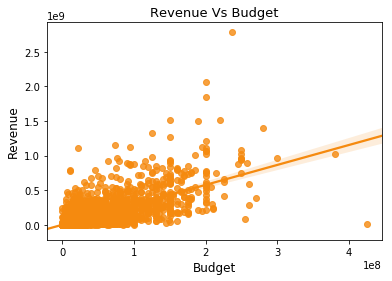

In [23]:
# Visualize the correlation between revenue and budget.
x = df_edited['budget']
y = df_edited['revenue']
corr_plot = sns.regplot(x=x,y= y,color='#f58a0f')

#setup the title and the labels of the scatter plot.
corr_plot.set_title("Revenue Vs Budget",fontsize=13)

corr_plot.set_xlabel("Budget",fontsize=12)
corr_plot.set_ylabel("Revenue",fontsize=12)

sns.set_style("whitegrid")



> The correlation between revenue and budget is **positive correlation** with value equal to **0.68**. This means that high budget movies tend to earn more profit. 

---

### Research Question 1: Which movie has made the highest or lowest profits?

Now, we can start to investigate more and find which movie has made the highest profits? And which movie has made the lowest profits? To answer this question, first, we need to create a new column called (**profits**) to calculate the difference between revenue earned and the budget spent for each movie in the dataset.

In [24]:
#  find the difference between revenue and budget for each movie
df_edited['profits'] = df_edited['revenue'] - df_edited['budget']
df_edited.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,profits
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354


In [25]:
#index of highest profit
high_index = df_edited['profits'].idxmax()
##index of low profit
low_index = df_edited['profits'].idxmin()
# find the movie which has made the highest profits
highest = pd.DataFrame(df_edited.loc[high_index])
# find the movie which has made the lowest profits
lowest = pd.DataFrame(df_edited.loc[low_index])
#combain the results
result = pd.concat([highest,lowest], axis=1)
#rename columns
result.rename(columns={high_index: 'highest_profit_movie',low_index: 'highest_profit_movie'}, inplace=True)
result

,highest_profit_movie,highest_profit_movie
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


> WooW as expected! The **Avatar** movie directed by James Cameron earned the highest profits **2.7B dollars** with budget spent **237M dollars**.They earned over **2.5B dollars**!   
The **The Warrior's Way** movie directed by Sngmoo Lee earned the lowest profits **11M dollars** with budget spent **425M dollars**. They lost over **413M dollars**.

---

### Research Question 2: What kinds of properties are associated with movies that have high profits?


This question can be answered by working with the new column (**profits**) and find the properties of movies that have high profits. There are some more questions need to investigate first:
<ol>
    <li>What are the top 5 movies based on its profits?</li>
    <li>Who directed the highest profits movies?</li>
    <li>Who actor/actress holds the record for acting in the highest profits movies?</li>
    <li>Which genre has the highest release of most profitable movies?</li>
    <li>Which keyword has the highest appearance of most profitable movies?</li>
    <li>What is the average runtime of the most profitable movies?</li>
    <li>What is the average budget of the most profitable movies?</li>
    </ol>

### 1. What are the top 5 movies based on its profits?

To answer this question, let's display the summary statistics of the new column (**profits**).

In [26]:
# summary statistics
df_edited['profits'].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profits, dtype: float64

The average profits of all movies in this dataset is approximately **70M dollars**. So, we can create a new data frame called (**high_profits_movies**) that contains the most profitable movies which earned more than or equal to **70M dollars**.

In [27]:
# query movies that have made over 70M dollars
high_profits_movies = df_edited.query('profits >= 70000000')
# sort the resulting DataFrame so that we can see the top 5 profitable movies
top_movies = high_profits_movies.sort_values(by=['profits'],ascending = False).head()
top_movies

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,profits
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360


> As we can see from the table above, the top 5 movies based on its profits are: <ol>
    <li>Avatar</li>
    <li>Star Wars: The Force Awakens</li>
    <li>Titanic</li>
    <li>Jurassic World</li>
    <li>Furious 7</li>
    </ol>

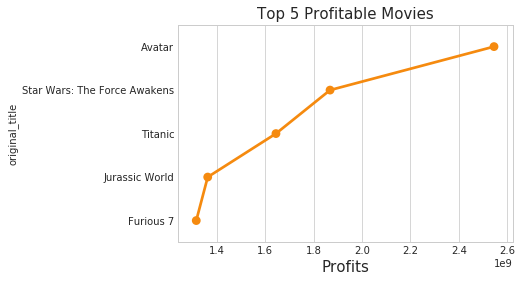

In [28]:
#Visualize the result in pointplot

x= top_movies['profits']
y = top_movies['original_title']
# pointplot for top 5 profitable movies.
top_mpvie_plot = sns.pointplot(x=x, y=y ,color='#f58a0f')

#setup the title and labels of the plot.
top_mpvie_plot.set_title("Top 5 Profitable Movies",fontsize = 15)
top_mpvie_plot.set_xlabel("Profits",fontsize = 15)
plt.show()

Great! Since the rest of the questions are intended to find the properties associated with movies that have high profits,  let us work with (**high_profits_movies**) data frame to answer them.

### 2. Who directed the highest profits movies?

In [29]:
# A function which will take any data frame and column name as an argument to group the similar records and return the count

def count(data,col):
    
    count = data[col].value_counts()
    
    return count

In [30]:
#call split multi-value function
directors = split_multivalue('director')
#call count function and display top 5 directors
top_directors = count(directors,'director')
top_directors[:5]

Steven Spielberg    22
Robert Zemeckis     12
Ridley Scott        10
Tim Burton           9
Michael Bay          8
Name: director, dtype: int64

> **Steven Spielberg** directed **22** movies profiting more than 70M dollars!! followed by **Robert Zemeckis** who directed **12**.   
It can be inferred from information above that any movies directed by these directors will have a higher probability for a movie to earn huge profits.  

### 3. Who actor/actress holds the record for acting in the highest profits movies?

In [31]:
#call split multi-value function
all_actors = split_multivalue('cast')
#call count function and display top 10 cast
top_actors = count(all_actors,'cast')
top_actors[:10]

Tom Cruise            26
Tom Hanks             20
Brad Pitt             20
Sylvester Stallone    20
Adam Sandler          19
Cameron Diaz          18
Bruce Willis          17
Ben Stiller           16
Will Smith            16
Jim Carrey            16
Name: cast, dtype: int64


>What a satisfying result!! **Tom Cruise** is in the TOP! followed by  **Brad Pitt**, and **Sylvester Stallone**.  
It can be inferred from information above that any movies hiring one or more of these famous actors is more likely for a movie to make a huge profits. 

### 3.Which genre has the highest release of most profitable movies?

In [32]:
#call split multi-value function
all_genres_type = split_multivalue('genres')
#call count function and display top 5 genre
top_genres = count(all_genres_type,'genres')
top_genres[:5]

Comedy       388
Action       386
Drama        370
Adventure    322
Thriller     313
Name: genres, dtype: int64

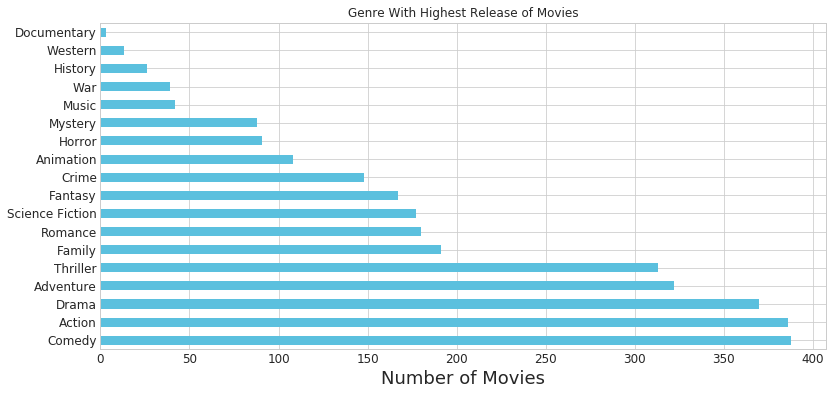

In [33]:
#  Visualize the result in a bar chart
# set the color
color= '#5bc0de'
#set the figure size
size = (13,6)

#initialize the plot
top_genres.sort_values(ascending = False, inplace = True)
genres_plot = top_genres.plot(kind= 'barh',figsize = size,fontsize=12, color=color)

#set the title
genres_plot.set(title = 'Genre With Highest Release of Movies')

#x-label
genres_plot.set_xlabel('Number of Movies', fontsize = '18')

#show the plot
plt.show()


> As illustrated in the plot, **Comedy** genre has the highest release of most profitable movies followed by  **Action** and **Drama**. 

### 4. Which keyword has the highest appearance of most profitable movies?

In [34]:
#call split multi-value function
all_keywords = split_multivalue('keywords')
#call count function and display top 10 keywords
top_keywords = count(all_keywords,'keywords')
top_keywords[:10]

based on novel          54
dystopia                38
duringcreditsstinger    30
london                  29
saving the world        27
sequel                  26
marvel comic            21
musical                 21
spy                     20
prison                  20
Name: keywords, dtype: int64

> It can be inferred from information above that the movies which are **based on novel** are the most movies profiting more than 70M dollars!!

### 5. What is the average runtime of the most profitable movies?

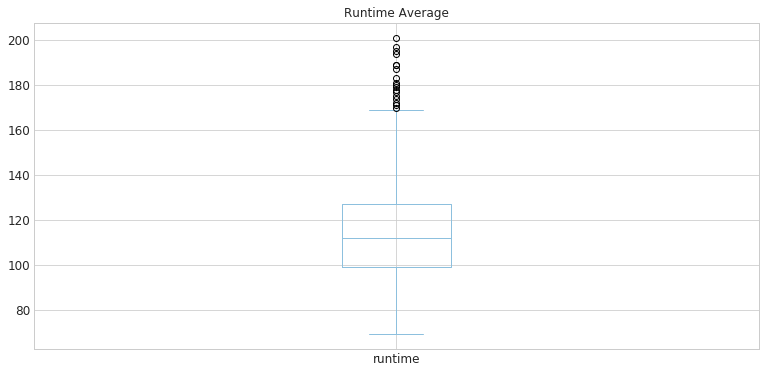

In [35]:
#  Visualize the result in a boxplot
# set the color
color= '#8Dc0de'
#set the figure size
size = (13,6)

#initialize the plot
avg_runtime_plot = high_profits_movies['runtime'].plot(kind='box',figsize = size,fontsize=12, color=color)

#setup the title
avg_runtime_plot.set(title = 'Runtime Average')


#show the plot
plt.show()

> The average runtime of the most profitable movies is between **114 minutes** - **115 minutes**.

### 6. What is the average budget of the most profitable movies?

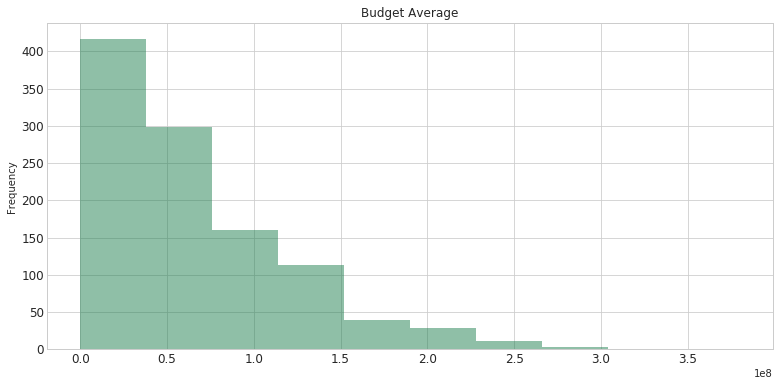

In [36]:
#  Visualize the result in a boxplot
# set the color
color= '#208050'
#set the figure size
size = (13,6)

#initialize the plot
avg_budget_plot = high_profits_movies['budget'].plot(kind='hist',figsize = size,fontsize=12, color=color, alpha=0.5)

#setup the title
avg_budget_plot.set(title = 'Budget Average')


#show the plot
plt.show()

> The average budget is approximately **50M dollar** to **60 M dollar**.

---

<a id='conclusions'></a>
## Conclusions

> Finally, after this analysis we going to summarize our findings and the results that have been performed. 
From the interesting facts we found about the most profitable movies, we can conclude what really makes a movie at box office success like **Avatar**, **Star Wars**, and **Titanic**. <ul>
    <li>The **runtime** movie should be around 114 min.</li>
    <li>The **budget** spend should be around 50 to 60 million dollar.</li>
    <li>The movie should be directed by one of the best movie **direcors** like Steven Spielberg, Robert Zemeckis, and Ridley Scott.</li>
    <li>Producers should include in the main **cast**  at lest one famous actors like Tom Cruise, Brad Pitt, Sylvester Stallone, Tom Hanks, (etc), since they have huge fans.</li>
    <li>Chose the movie **genre** that consistently provides the best returns like Comedy, Action, or Drama.</li>
    <li>The movie should be based on novel or about saving the world.</li>
    </ul>


> **Limitations** <ul>
    <li>If we produce a movie with these criteria, we will have a high probability of making high profits. However, It's not 100% guaranteed result as there is no advaned statistics were performed.</li>
    <li>There are many rows in the dataset have been removed due to missing data in the revenue, budget, and runtime columns.</li>
    </ul>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])